# Linear Regression Visualization
This notebook demonstrates a simple linear regression example including train/test split, fitted line, and loss (MSE) visualization.

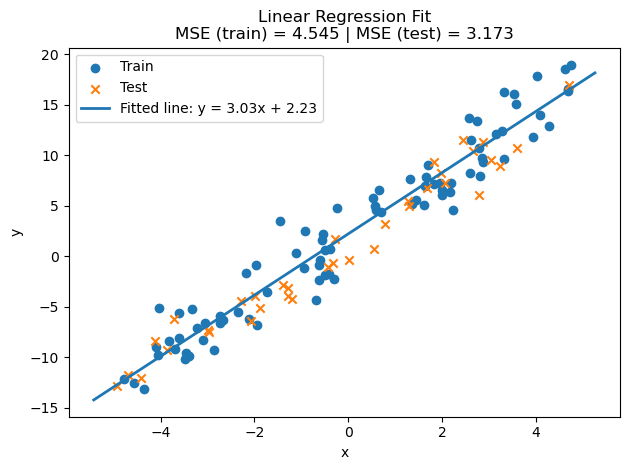

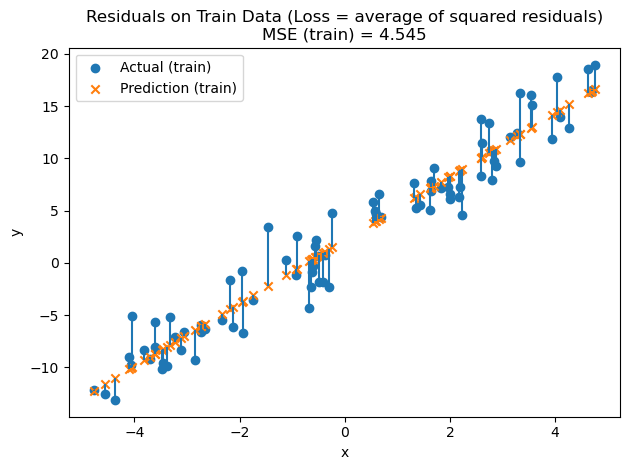

,x,y (actual),y_hat (pred),error = y - y_hat,squared_error
0,-4.772879,-12.137468,-12.226170,0.088702,0.007868
1,-4.561962,-12.516602,-11.587160,-0.929442,0.863862
2,-4.361827,-13.116640,-10.980815,-2.135825,4.561750
3,-4.099521,-9.010687,-10.186112,1.175425,1.381625
4,-4.058227,-9.734686,-10.061002,0.326316,0.106482
5,-4.036090,-5.073323,-9.993936,4.920613,24.212435
6,-3.819941,-8.383592,-9.339073,0.955481,0.912944
7,-3.700785,-9.209920,-8.978068,-0.231851,0.053755
8,-3.602475,-8.037524,-8.680221,0.642698,0.413061
9,-3.602030,-5.647908,-8.678873,3.030965,9.186750


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1) Create a simple synthetic dataset
rng = np.random.default_rng(42)
n = 120
X = rng.uniform(-5, 5, size=n)
true_m, true_b = 3.0, 2.0
noise = rng.normal(0, 2.0, size=n)
y = true_m * X + true_b + noise

# 2) Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 3) Fit linear regression by closed-form least squares
X_train_design = np.c_[X_train, np.ones_like(X_train)]
theta_hat, *_ = np.linalg.lstsq(X_train_design, y_train, rcond=None)
m_hat, b_hat = theta_hat

# Predictions
def predict(x):
    return m_hat * x + b_hat

y_train_pred = predict(X_train)
y_test_pred  = predict(X_test)

# Mean Squared Error (loss)
mse_train = float(np.mean((y_train - y_train_pred) ** 2))
mse_test  = float(np.mean((y_test  - y_test_pred)  ** 2))

# 4) Plot A: Train/Test scatter + fitted line
fig1 = plt.figure()
x_line = np.linspace(X.min() - 0.5, X.max() + 0.5, 200)
y_line = predict(x_line)

plt.scatter(X_train, y_train, label="Train")
plt.scatter(X_test, y_test, marker="x", label="Test")
plt.plot(x_line, y_line, linewidth=2, label=f"Fitted line: y = {m_hat:.2f}x + {b_hat:.2f}")
plt.title(f"Linear Regression Fit\nMSE (train) = {mse_train:.3f} | MSE (test) = {mse_test:.3f}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.show()

# 5) Plot B: Residuals on TRAIN (how the loss is computed)
fig2 = plt.figure()
plt.vlines(X_train, y_train_pred, y_train)
plt.scatter(X_train, y_train, label="Actual (train)")
plt.scatter(X_train, y_train_pred, marker="x", label="Prediction (train)")
plt.title(f"Residuals on Train Data (Loss = average of squared residuals)\nMSE (train) = {mse_train:.3f}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.show()

# 6) Table: per-point loss (first 10 train samples)
order = np.argsort(X_train)
first10 = order[:10]
df_explain = pd.DataFrame({
    "x": X_train[first10],
    "y (actual)": y_train[first10],
    "y_hat (pred)": y_train_pred[first10],
})
df_explain["error = y - y_hat"] = df_explain["y (actual)"] - df_explain["y_hat (pred)"]
df_explain["squared_error"] = df_explain["error = y - y_hat"] ** 2
df_explain = df_explain.reset_index(drop=True)
df_explain


## Loss Computation Formula
The **Mean Squared Error (MSE)** is defined as:
$ \text{MSE} = \frac{1}{n}\sum_i (y_i - (m \cdot x_i + b))^2 $